# Compare AE algorithms on Price Estimation

To compare the performance of Amplitude Estimation (**AE**) algorithms on different price estimation problems the module **benchmark.q_ae_price.benchmark_ae_option_price.py** has been developed. This module allows the user to use the **QQuantLib/finance/ae_price_estimation** (see notebook *misc/notebooks/12_ApplicationTo_Finance_03_AEPriceEstimation.ipynb*) module for automatizing in an easy way the simulation done in price estimation.


## 1. How to use it?

The *benchmark_ae_option_price.py* script should be used from the command line and several arguments can be provided for configuring the price estimation problem. For getting a list of the arguments following comand should be used:

    python benchmark_ae_option_price.py -h

The output is the following:

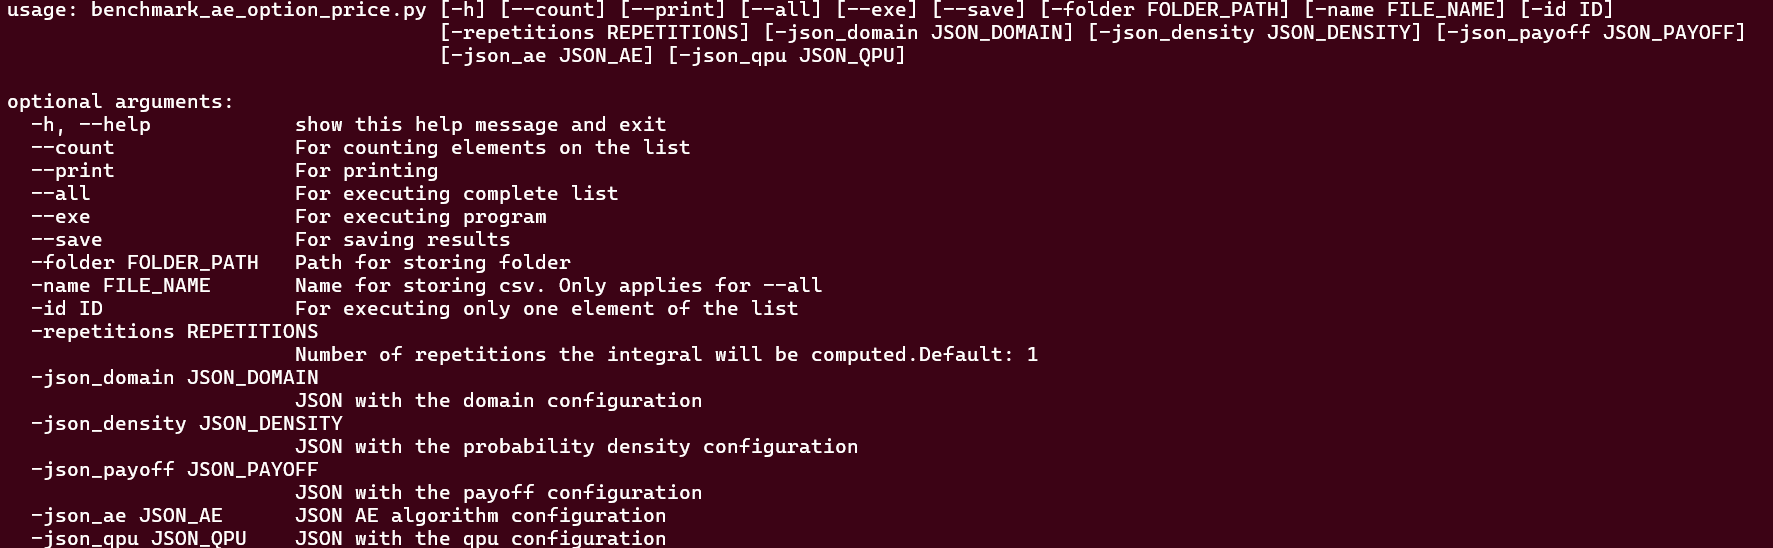

## 2. Providing the AE price estimation configuration

To use the **QQuantLib/finance/ae_price_estimation** module for simulating a price estimation problem using **AE** algorithms a complete configuration dictionary should be provided. This dictionary can be split in the following sub-configurations:

* domain configuration: for configuring the domain and the discretization of our problem.
* probability density configuration: for providing the configuration of the asset and the market info.
* payoff configuration: for configuring the payoff
* Amplitude Estimation algorithm configuration.
* qpu configuration.

The **benchmark_ae_option_price.py** provides this info to the **QQuantLib/finance/ae_price_estimation** module by using different JSON files. This allows to the user automatize easily the simulations only by configuring these files properly.



### 2.1 Domain configuration

An example of the JSON file for the domain configuration, can be found in **./jsons/domain_configuration.json**. The complete path to the domain JSON file should be provided to *benchmark_ae_option_price.py* using the argument **-json_domain**.

### 2.2 Probability density configuration

An example of the JSON file for the probability density configuration can be found in **./jsons/density_probability.json**. The complete path to the domain JSON file should be provided to *benchmark_ae_option_price.py* using the argument **-json_density**.

### 2.3 PayOff configuration

An example of the JSON file for the payoff configuration can be found in **./jsons/payoffs.json**. The complete path to the domain JSON file should be provided to *benchmark_ae_option_price.py* using the argument **-json_payoff**.

### 2.4 Amplitude Estimation configuration

An example of the JSON file for the amplitude estimation algorithm configuration can be found in **./jsons/ae_configuration.json**. The complete path to the domain JSON file should be provided to *benchmark_ae_option_price.py* using the argument **-json_ae**.

### 2.5 QPU configuration

The QPU configuration should be provided as a JSON file. An example of the format can be found in **./jsons/qpu_ideal.json**. The complete path to the domain JSON file should be provided to *benchmark_ae_option_price.py* using the argument **-json_qpu**.

**BE AWARE**

The price estimation problem using **AE** algorithms can be simulated using ideal QPUS (the **./jsons/qpu_ideal.json** can be used directly) or using noisy QPUs. In this case, the building of the QPU is very complex because the different channels to be simulated should be selected and properly configured. 

In the *benchmark_ae_option_price.py* script the **QQuantLib.qpu.model_noise** module is used to build the noisy qpu. This module allows the user to select and configure the following channels:

1. Depolarizing channel.
2. Amplitude Damping.
3. Dephasing (only if there is Amplitude Damping).
4. Measurement Channel.

We refer to the notebook: *QQuantLib/qpu/NoisyModels.ipynb* for understanding the noisy model that we have built. 
An example of noisy configuration QPUs can be found in **./jsons/qpu_noisy.json**

**The noisy QPUs can be only used in a Eviden Quantum Learning Machine and cannot be used with myqlm library**

### Some Words about configuration JSON files

The *benchmark_ae_option_price.py* script converts the JSON files to Python dictionaries for feeding the **QQuantLib/finance/ae_price_estimation** (that has the code for simulating a price estimation using an amplitude estimation algorithm). Additionally, these dictionaries are processed using the functions from **QQuantLib.utils.benchmark_utils** before being provided to the  **QQuantLib/finance/ae_price_estimation** module. To understand the different functions from the **QQuantLib.utils.benchmark_utils** module we refer to the notebook *misc/notebooks/14_Benchmark_utils.ipynb*. 

The idea of doing this is to allow the user to configure a lot of different simulations using the JSON files.

## 3 Getting the number of cases to execute.

As explained before the user can configure the JSONs in such a way that can create different price estimation problems to be solved using different **AE** algorithms and configurations. To know the total number of experiments to execute the user can  provide the argument **--count**.

For example the following command:

    python benchmark_ae_option_price.py -json_domain jsons/domain_configuration.json -json_density jsons/density_probability.json  -json_payoff jsons/payoffs.json -json_ae jsons/ae_configuration.json -json_qpu jsons/qpu_ideal.json --count
    
should provide: 2478

**BE AWARE** 
This will be true if the user does not modify the following JSON files: *domain_configuration.json*,  *density_probability.json*, *payoffs.json*, *ae_configuration.json* and *qpu_ideal.json*

## 4 Print the info for the case

The **--print** argument allows the user to print the configuration of the problem to solve. It can be used with two additional commands:

* --all: In this case, the complete list of dictionaries is printed.
* -id 5: In this case, the complete configuration of the 5th price estimation problem (with the corresponding **AE** algorithm configuration) will be printed. 



## 5 Execution of the case

For executing a selected case the **--exe** argument should be provided in combination with the element of the list of dictionaries to be executed. 

The following command will execute the 5 probability estimation problem of the input list of dictionaries.

    python benchmark_ae_option_price.py -json_domain jsons/domain_configuration.json -json_density jsons/density_probability.json  -json_payoff jsons/payoffs.json -json_ae jsons/ae_configuration.json -json_qpu jsons/qpu_ideal.json -id 5 --exe 

## 6 Other arguments

Other arguments that can be provided are:

* -repetitions REPETITIONS: for executing one case REPETITIONS times
* -folder: Path with folder where the Pandas DataFrames will be saved
* -name: for providing an additional name to the saved pdf
* --save: For saving the obtained Pandas DataFrame

## 7. Results

Here we provide some results of the performance of different **AE** algorithms (and configurations) over different Price Estimation problems.



### 7.1. Positive PayOffs

**Configuration of the price estimation problem**

* Domain: x0 = 0.01, xf=5.0, n_qubits=5
* Density: 
    * probability_type: Black-Scholes
    * s_0: 1.0
    * risk_free_ratio: 0.05
    * maturity: 1.0
    * volatility: 0.5
* PayOffs:
    * pay_off_type: Digital_Call_Option, strike: 0.5, coupon: 1.0
    * pay_off_type: Digital_Put_Option, strike: 1.5, coupon: 1.0
    * pay_off_type: European_Call_Option, strike: 0.5, coupon: None
    * pay_off_type: European_Put_Option, strike: 1.5, coupon: None

For solving these Price Estimation problems we have used Direct Encoding (encoding 2) and the following AE algorithms:

* IQAE and mIQAE: shots=100, $\alpha$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]
* RQAE and mRQAE: q=2, $\gamma$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]. 
* sRQAE: shots=100, q=2, $\gamma$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]. 

The following graphs show the performance of the different **AE** algorithms and configurations. Each point is the median over 100 repetitions meanwhile the error bars present the interquartile range (25-75%) for the 100 points:

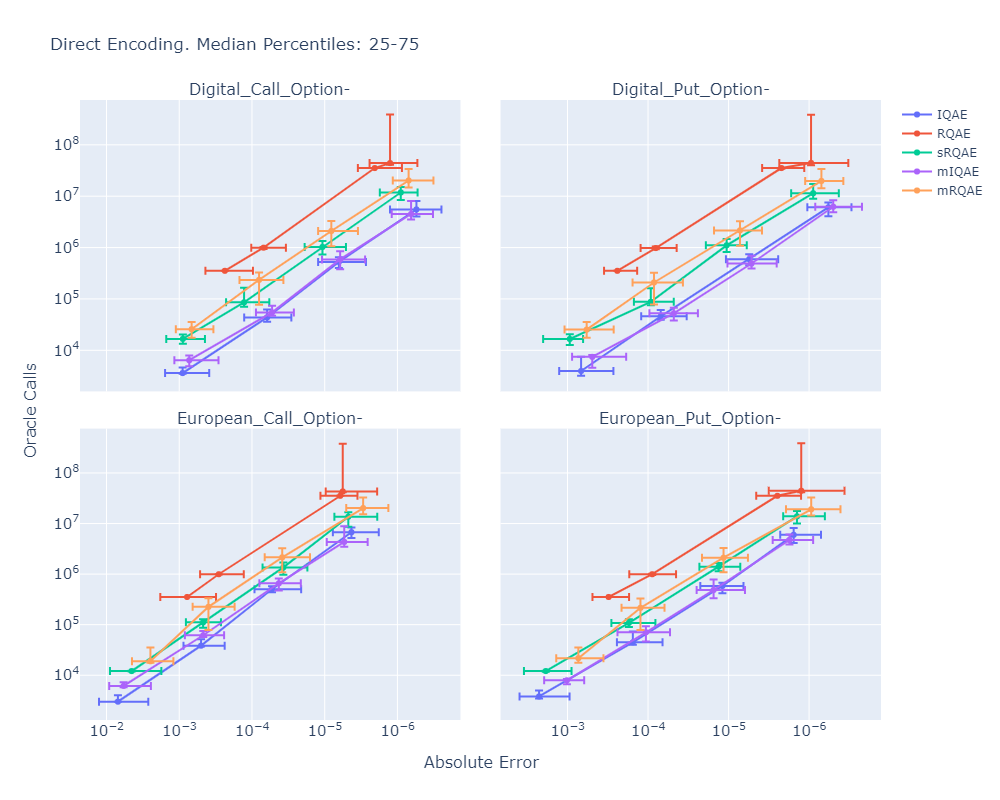

### 7.2 PayOff with Positive and negative part

* Domain: x0 = 0.01, xf=5.0, n_qubits=5
* Density: 
    * probability_type: Black-Scholes
    * s_0: 1.0
    * risk_free_ratio: 0.05
    * maturity: 1.0
    * volatility: 0.5
* PayOffs:
    * pay_off_type: futures, strike: 1.5, coupon: 1.0

For this derivative configuration the expected value **is negative**. For solving these Price Estimation problems we have used Direct Encoding (encoding 2) and the following AE algorithms:

* IQAE and mIQAE: shots=100, $\alpha$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]
* RQAE and mRQAE: q=2, $\gamma$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]. 
* sRQAE: shots=100, q=2, $\gamma$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]. 

The following graphs show the performance of the different **AE** algorithms and configurations. Each point is the median over 100 repetitions meanwhile the error bars present the interquartile range (25-75%) for the 100 points:

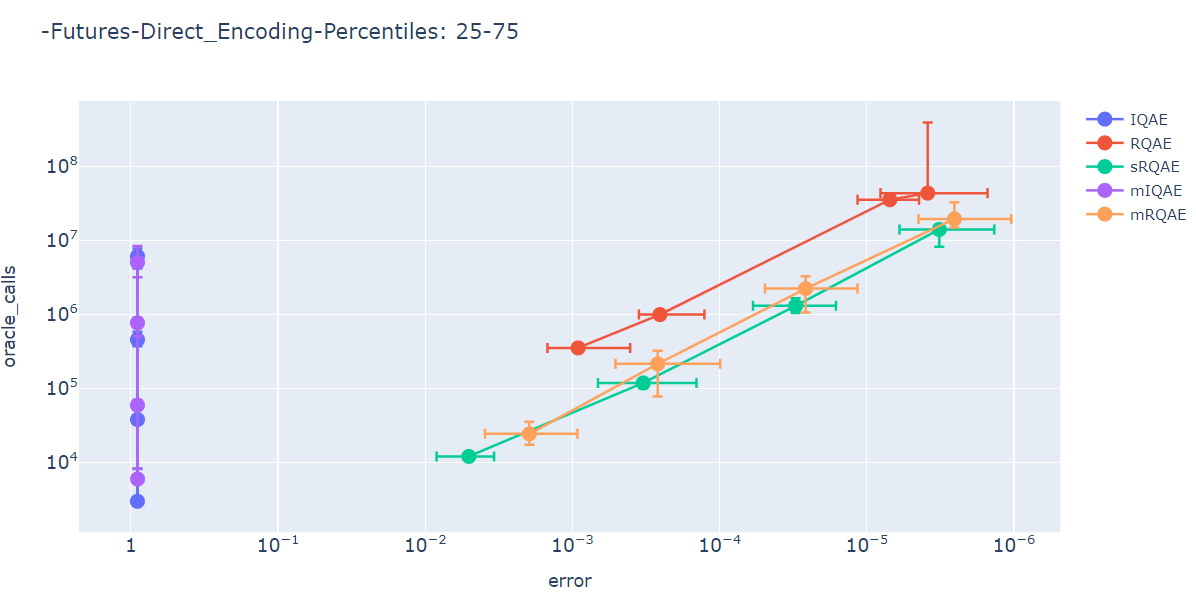

As can be seen, only **RQAE** algorithms can provide the correct value because these methods estimate the amplitude instead of the probability (like the typical algorithms like **IQAE**, **MLAE** etc...)

## 8. Negative AE estimation loading payoffs by parts.

When the function to integrate has negative parts in the domain the resultant integral can be positive or negative. In general, the square encoding and the typical **AE** algorithms usually fail when estimating it (because they return probabilities). In this case, another approach can be used: the negative and the positive parts of the function can be loaded separately and the **AE** algorithms can be used for getting two estimations that should be properly post-proceded for getting the correct estimation. This can be done using the *ae_price_estimation_step_po* function from **QQuantLib.finance.ae_price_estimation_step_payoff** module. 

The **benchmark.q_ae_price.benchmark_ae_option_price_step_po.py** script can be used for generating in an easy way the price estimation and **AE** algorithm configuration for feeding to the *ae_price_estimation_step_po* function. 

The working of the **benchmark_ae_option_price_step_po.py** is the same as the **benchmark_ae_option_price.py** explained in this notebook.


## 8.1 Results: Futures loaded in two steps.

We have the following price estimation configuration:

* Domain: x0 = 0.01, xf=5.0, n_qubits=5
* Density: 
    * probability_type: Black-Scholes
    * s_0: 1.0
    * risk_free_ratio: 0.05
    * maturity: 1.0
    * volatility: 0.5
* PayOffs:
    * pay_off_type: futures, strike: 1.5, coupon: 1.0
    
The expected value is negative. For solving this problem we have used the **benchmark.q_ae_price.benchmark_ae_option_price_step_po.py**. We have used the square and the direct encoding and the following AE algorithms for getting the price estimation:

* IQAE and mIQAE: shots=100, $\alpha$=0.05, $\epsilon$=[$10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$]

In the following graph, we compare the performance for **IQAE** and the **mIQAE** algorithms using direct encoding (encoding 2) when the future was loaded by parts with the performance of the different **RQAE** algorithms when using the Direct encoding over the same future. Each point is the median over 100 repetitions meanwhile the error bars present the interquartile range (25-75%) for the 100 points:

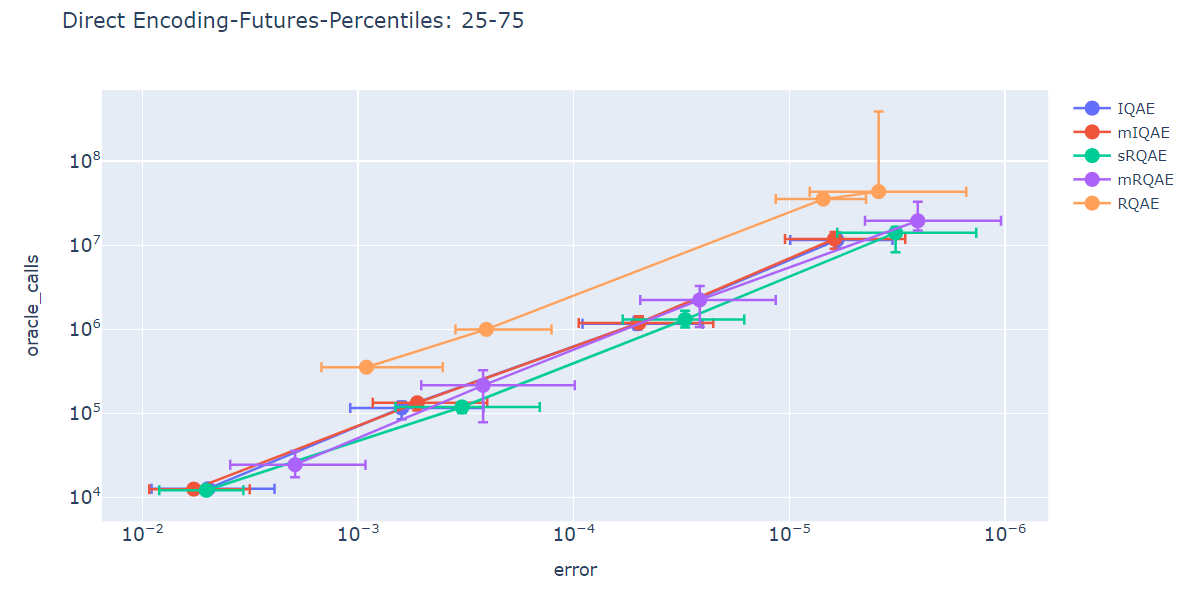

As can be seen the **sRQAE** has an increase of performance over the **IQAE** or **mIQAE** algorithms when the future is loaded by parts. The **mRQAE** has a performance similar to the **IQAE** and **mIQAE**.

It is useful instead of plotting the error bars using the interquartile range, to plot the error bars between the minimum and maximum error obtained in the estimation. This is done in the following graph:

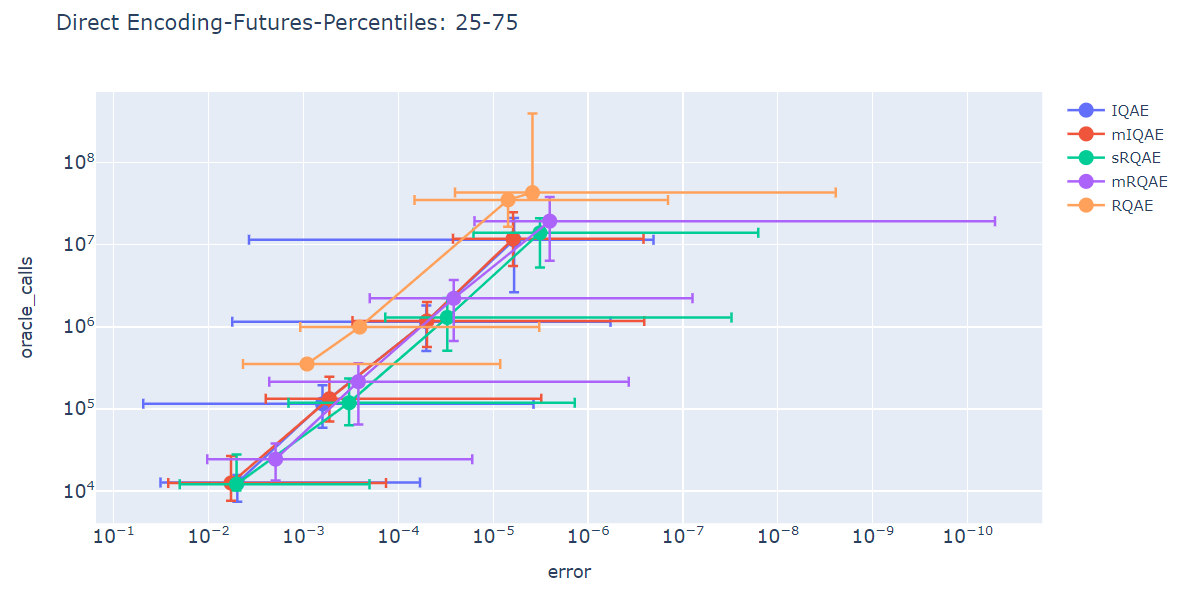

As can be seen, the error bars for the **IQAE** algorithm are very large due to the apparition of outliers in this algorithm.

In the following graph, we compare the performance for **IQAE** and the **mIQAE** algorithms using square encoding (encoding 0) when the future was loaded by parts with the performance of the different **RQAE** algorithms when using the Direct encoding over the same future. Each point is the median over 100 repetitions meanwhile the error bars present the interquartile range (25-75%) for the 100 points:

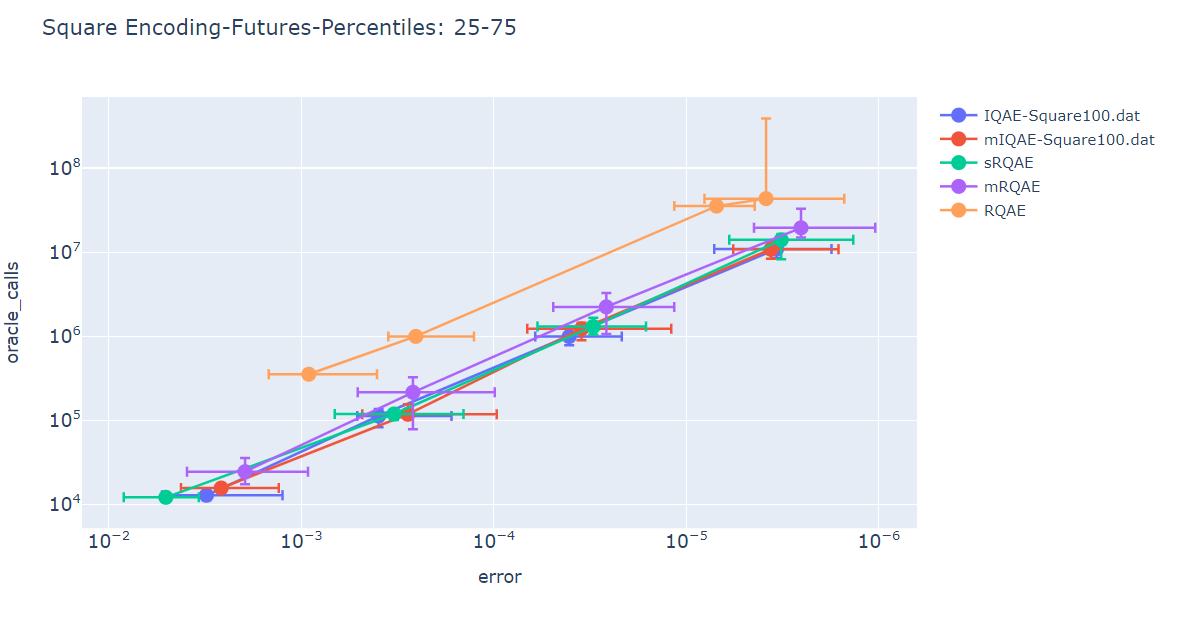

In this case, the **sRQAE** shows a similar performance to **IQAE** and **mIQAE** algorithms. The performance of the **mRQAE** is a little worse than **IQAE** and **mIQAE**.

Again in the following graph, we plot the difference between maximum and minimum error, instead of interquartile range for the square encoding simulation.

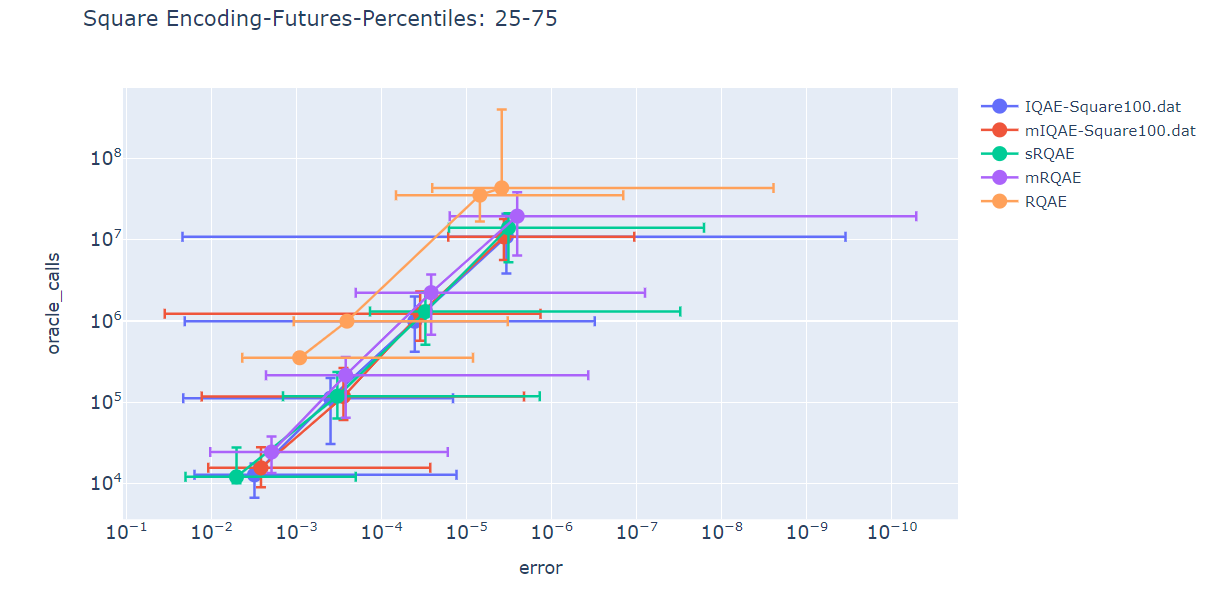

Again the **IQAE** algorithms have some outliers that increase the error bars.